In [1]:
from pylab import *

In [3]:
import nltk
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re, string
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaylanguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def get_stop_words():
    stop_words = stopwords.words('english')
    stop_words = stop_words + list(string.printable)
    return stop_words

In [10]:
def get_and_prepare_data(stop_words):
    newsgroups_data_sample = fetch_20newsgroups(subset='train')
    tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                        for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                        if word.lower() not in stop_words]
    return tokenized_corpus

In [6]:
def get_frequency(corpus, n):
    token_count_di = Counter(corpus)
    return token_count_di.most_common(n)

In [12]:
stop_word_list = get_stop_words()
corpus = get_and_prepare_data(stop_word_list)
get_frequency(corpus, 50)

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

In [16]:
def get_actual_and_expected_frequencies(corpus):
    fred_dict = get_frequency(corpus, 1000)
    actual_frequencies = []
    expected_frequencies = []
    for rank, tup in enumerate(fred_dict):
        actual_frequencies.append(log(tup[1]))
        rank = 1 if rank == 0 else rank
        expected_frequencies.append(1/rank)
    return actual_frequencies, expected_frequencies

In [17]:
def plot(actual_frequencies, expected_frequencies):
    plt.plot(actual_frequencies, 'g*', expected_frequencies, 'ro')
    plt.show()

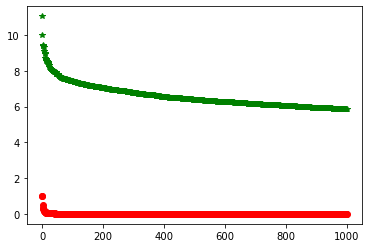

In [18]:
actual_frequencies, expected_frequencies = get_actual_and_expected_frequencies(corpus)
plot(actual_frequencies, expected_frequencies)